In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_classif,chi2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
!pip install scikit-learn --upgrade
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# read file csv into dataframe
df = pd.read_csv('/content/Travel.csv')



In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.1
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.17.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.2
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.7
cufflinks==0.17.3
cupy-cuda12x==12.2.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
c

**EDA**





In [ ]:
# view info attributes and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
df.shape

(4888, 20)

In [ ]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


Descriptive Statistical summary

In [ ]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [ ]:
df['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [ ]:
df['CityTier'].value_counts()

1    3190
3    1500
2     198
Name: CityTier, dtype: int64

In [ ]:
df['ProductPitched'].value_counts()

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

In [ ]:
df['MaritalStatus'].value_counts()


Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

There is mistake somewhere in Gender column showing Fe Male category which should be correcrted

In [ ]:
#df.replace('Fe Male','Female', inplace = True)
#df['Gender'].value_counts()

There is mistake somewhere in Marital Status column showing unmarried category which should be correcrted to single

In [ ]:
#df.replace('Unmarried','Single', inplace = True)
#df['MaritalStatus'].value_counts()

In [ ]:
# To check the independence of rows
df.duplicated().sum()

0

In [ ]:
# Checking for Missing Values
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [ ]:
# proportion of count data on categorical columns
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Self Enquiry       70.820481
Company Invited    29.179519
Name: TypeofContact, dtype: float64
---------------------------
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: Occupation, dtype: float64
---------------------------
Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: Gender, dtype: float64
---------------------------
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: ProductPitched, dtype: float64
---------------------------
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: MaritalStatus, dtype: float64
---------------------------
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: Designation, dtype: float64
---------------------------


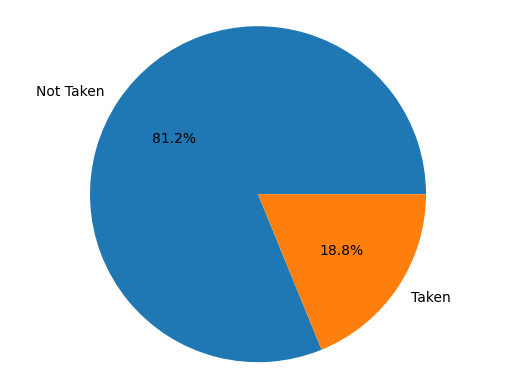

In [ ]:
plt.pie(df['ProdTaken'].value_counts(), labels=['Not Taken', 'Taken'], autopct='%0.1f%%')
plt.axis('equal')
plt.show()


In [ ]:
# define numerical & categorical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# print columns
print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 14 numerical columns : ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']

We have 6 categorical columns : ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


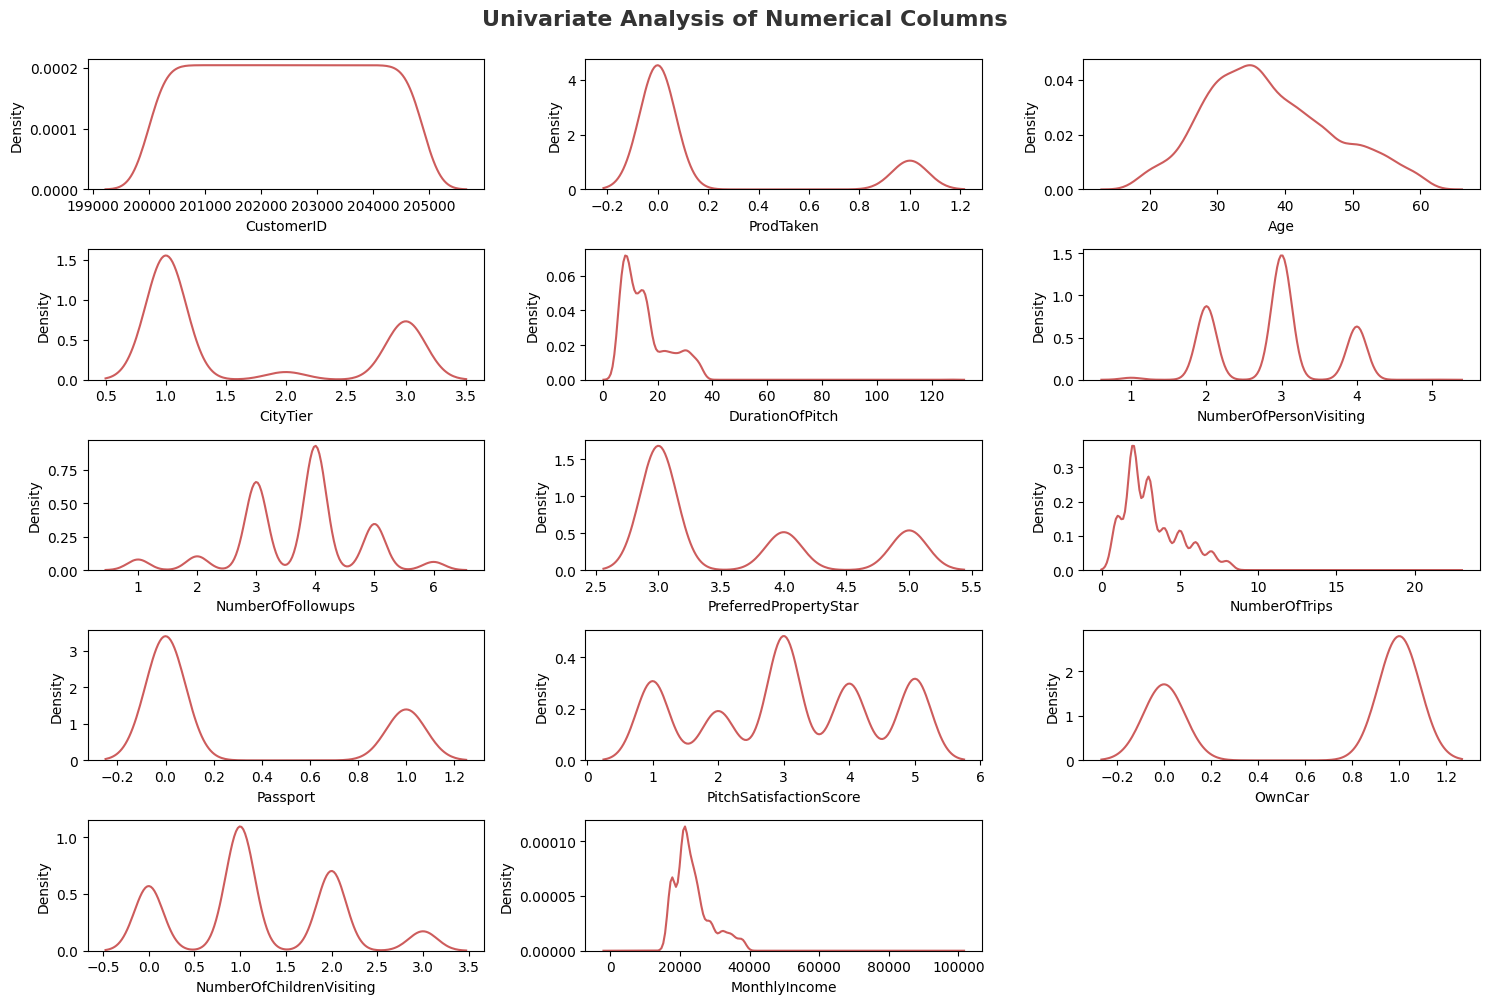

In [ ]:
# numerical columns
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='indianred')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

# save plot
#plt.savefig("C:\Users\Lenovo\OneDrive\Pictures\chart\figures.png")

The CustomerID column has too much data spread, perhaps because the customers in each row are always unique so this column can be deleted later.
The Age column seems to approximate a normal distribution.
The DurationOfPitch, NumberOfTrips, and MonthlyIncome columns seem to have a positively skewed data distribution (leaning to the right) which indicates there are outliers.
Other columns can be ignored because they are actually discrete or ordinal data types

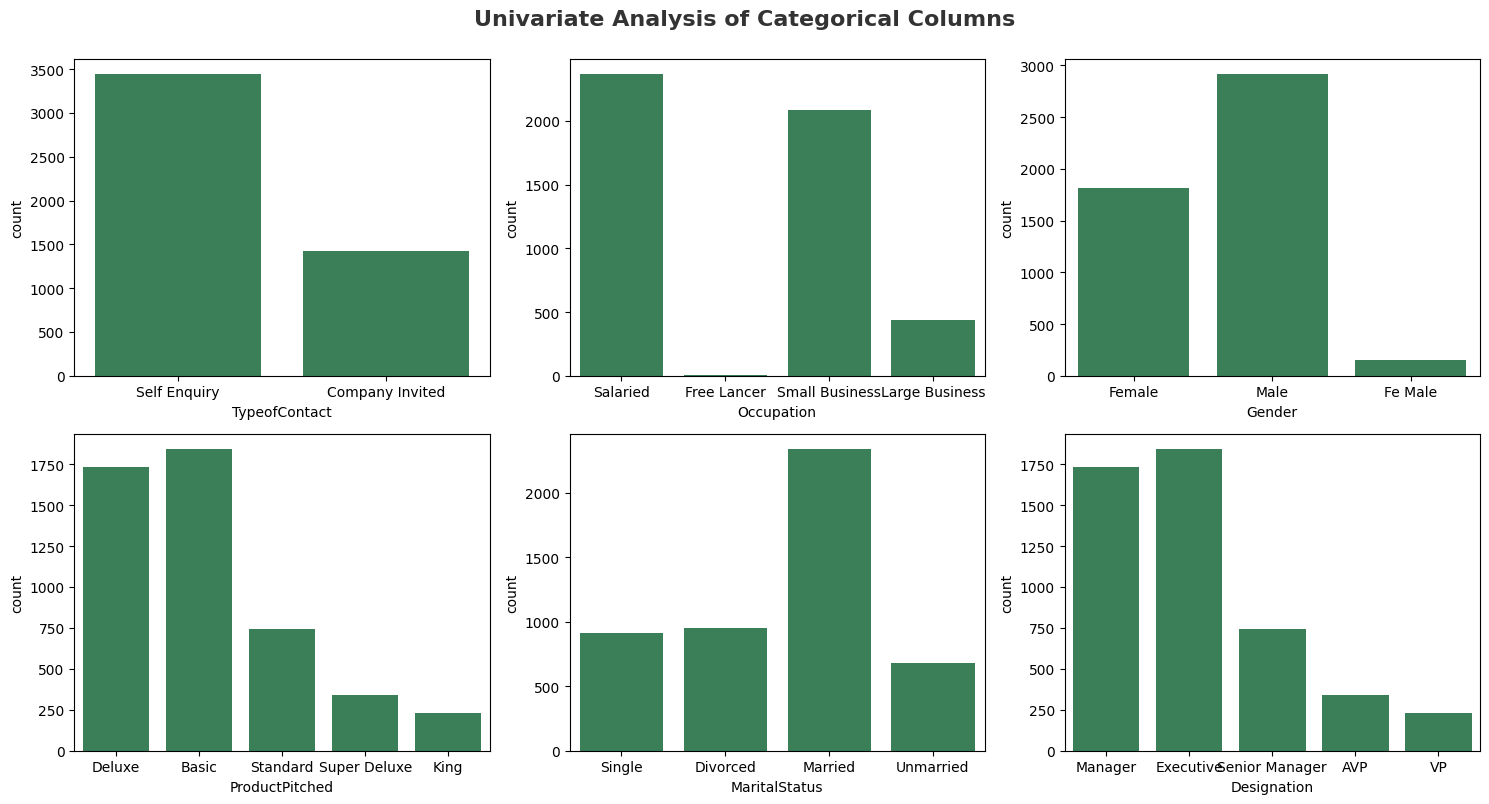

In [ ]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[cat_cols[i]], color='seagreen')
    plt.tight_layout()





From the visualization results above, it can be concluded that:

The TypeofContact column is dominated (data proportion more than 50%) by Self Inquiry.
The Occupation column is dominated by Salaried and Small Business, but the number of Free Lancers is too few so they can be deleted later.
In the Gender column there are more males than females. Apart from that, there was an error in writing the Fe Male category which should have been Female.
In the ProductPitched and Designation columns, 2 categories dominate.
The MaritalStatus column is dominated by Married status. Then the statuses Single and Unmarried can be interpreted the same way so they can be combined.

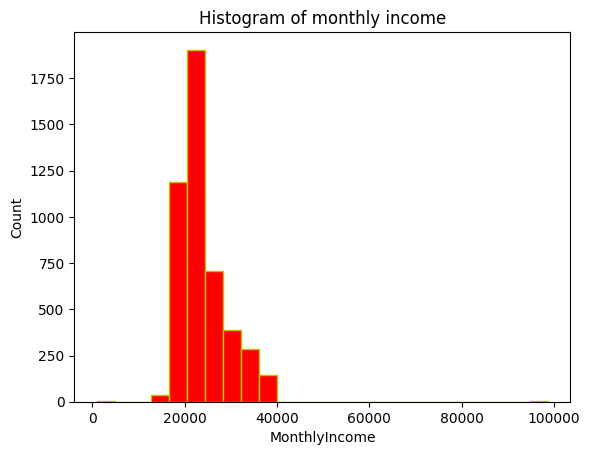

In [ ]:
plt.hist(df['MonthlyIncome'], bins=25, edgecolor='y', color='r')
plt.xlabel('MonthlyIncome')
plt.ylabel('Count')
plt.title('Histogram of monthly income')
plt.show()

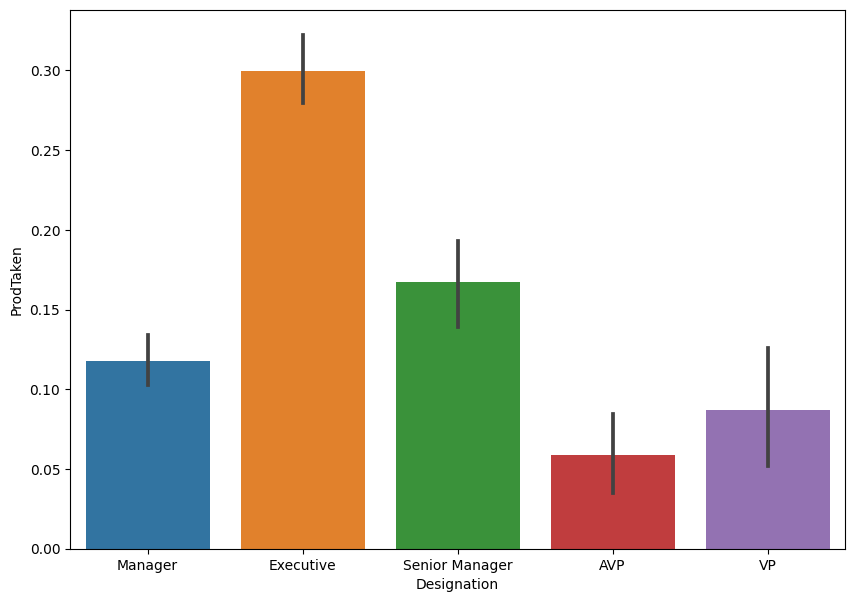

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(x=df['Designation'], y=df['ProdTaken'])
plt.show()

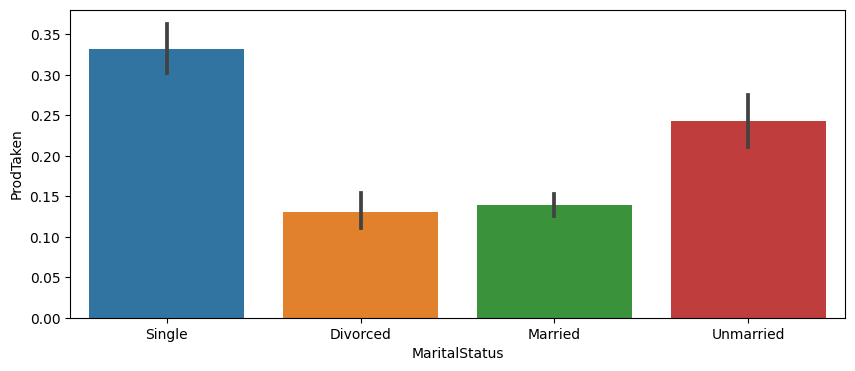

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df['MaritalStatus'], y=df['ProdTaken'])
plt.show()

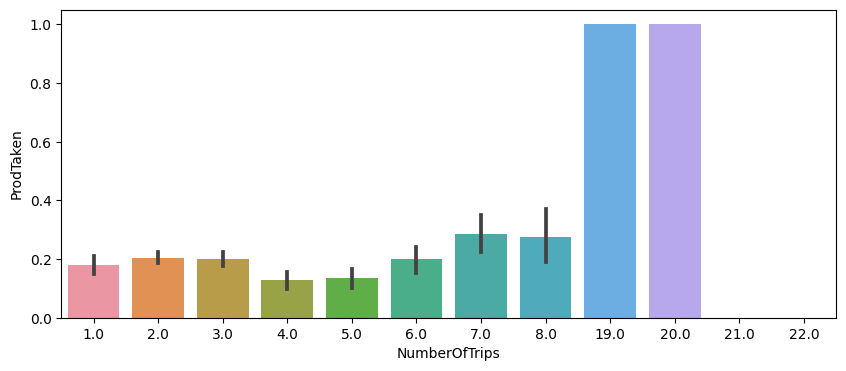

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df['NumberOfTrips'], y=df['ProdTaken'])
plt.show()

<Axes: xlabel='Age', ylabel='count'>

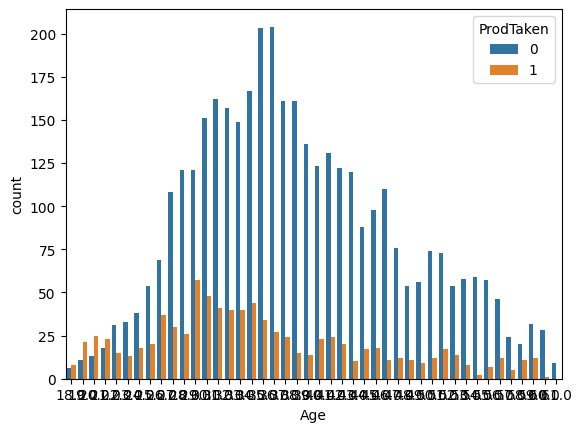

In [ ]:
sns.countplot(x='Age',hue='ProdTaken',data=df)

<Axes: xlabel='DurationOfPitch', ylabel='count'>

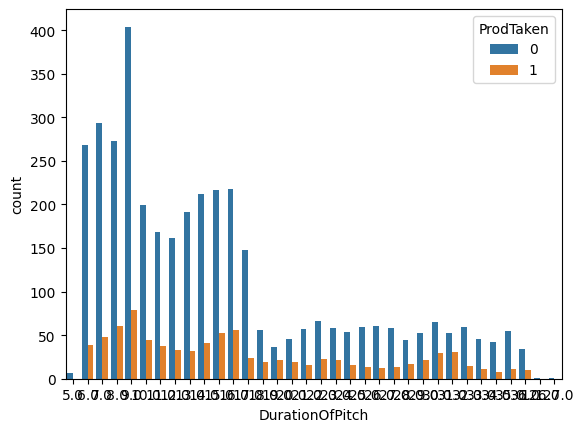

In [ ]:
sns.countplot(x='DurationOfPitch',hue='ProdTaken',data=df)

<Axes: xlabel='PitchSatisfactionScore', ylabel='count'>

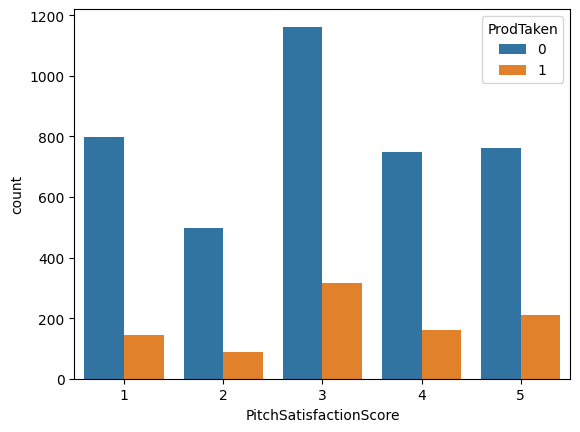

In [ ]:
sns.countplot(x='PitchSatisfactionScore',hue='ProdTaken',data=df)

<Axes: xlabel='MaritalStatus', ylabel='count'>

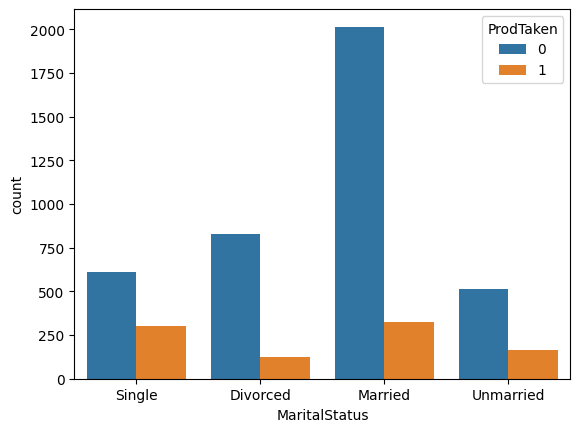

In [ ]:
sns.countplot(x='MaritalStatus',hue='ProdTaken',data=df)

<Axes: xlabel='MonthlyIncome', ylabel='count'>

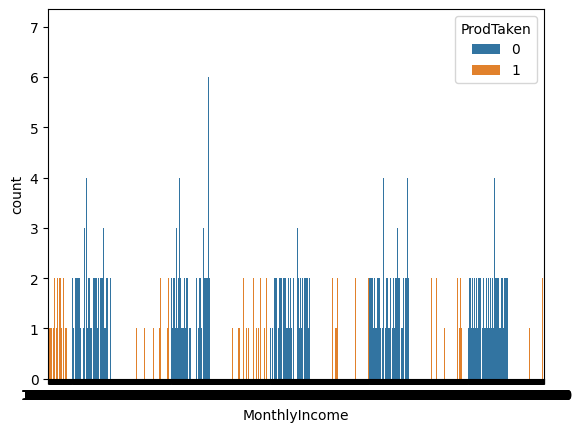

In [ ]:
sns.countplot(x='MonthlyIncome',hue='ProdTaken',data=df)

<Axes: xlabel='Passport', ylabel='count'>

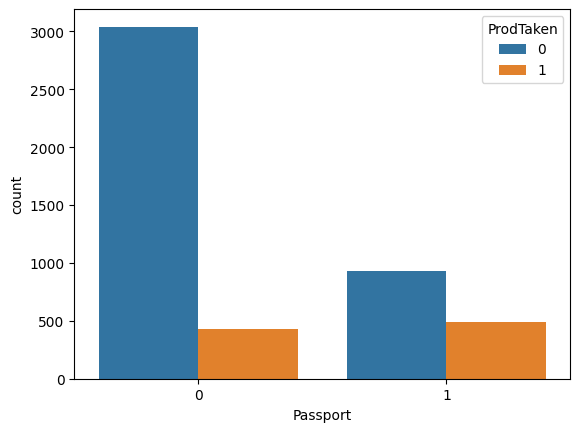

In [ ]:
sns.countplot(x='Passport',hue='ProdTaken',data=df)

<Axes: xlabel='Designation', ylabel='count'>

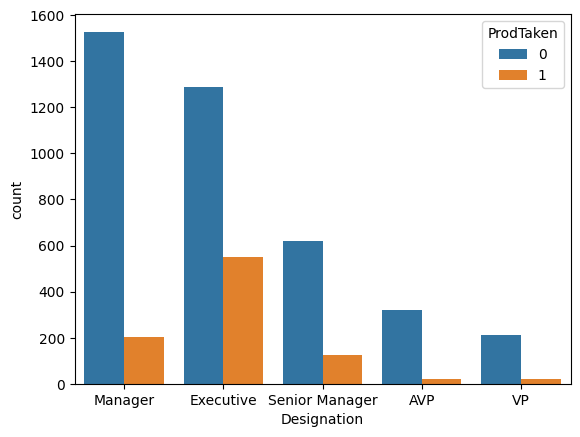

In [ ]:
sns.countplot(x='Designation',hue='ProdTaken',data=df)

<Axes: xlabel='ProductPitched', ylabel='count'>

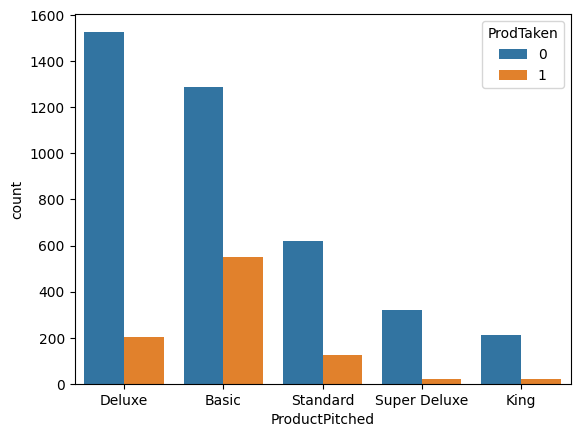

In [ ]:
sns.countplot(x='ProductPitched',hue='ProdTaken',data=df)

<Axes: xlabel='TypeofContact', ylabel='count'>

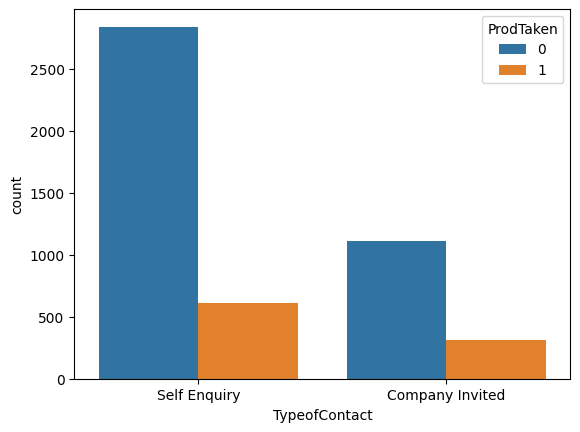

In [ ]:
sns.countplot(x='TypeofContact',hue='ProdTaken',data=df)

Negative correlation is measured from -0.1 to -1.0. Weak negative correlation being -0.1 to -0.3, moderate -0.3 to -0.5, and strong negative correlation from -0.5 to -1.0.

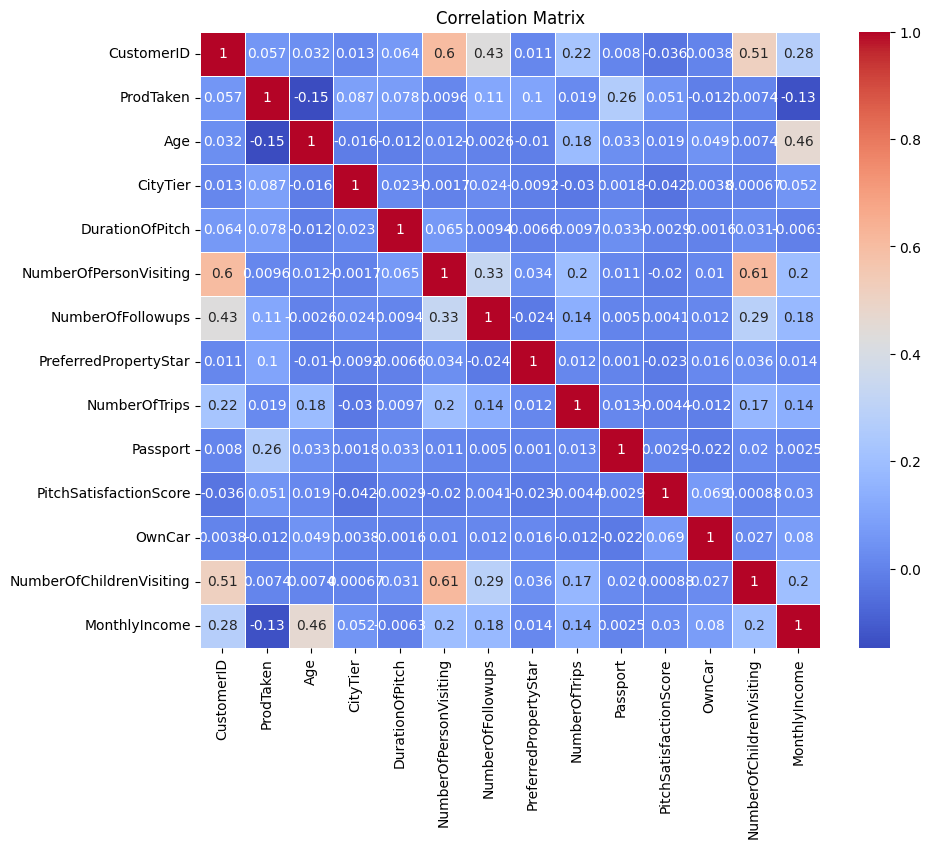

In [ ]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

From the correlation results it is known that:

Our target column ProdTaken has a weak negative correlation to Age and MontlyIncome.
The NumberOfFollowups and Passport columns also have a weak positive correlation to ProdTaken.
The NumberOfPersonVisiting and NumberOfChildrenVisiting columns have a strong enough positive correlation that they can be combined into a new column feature.

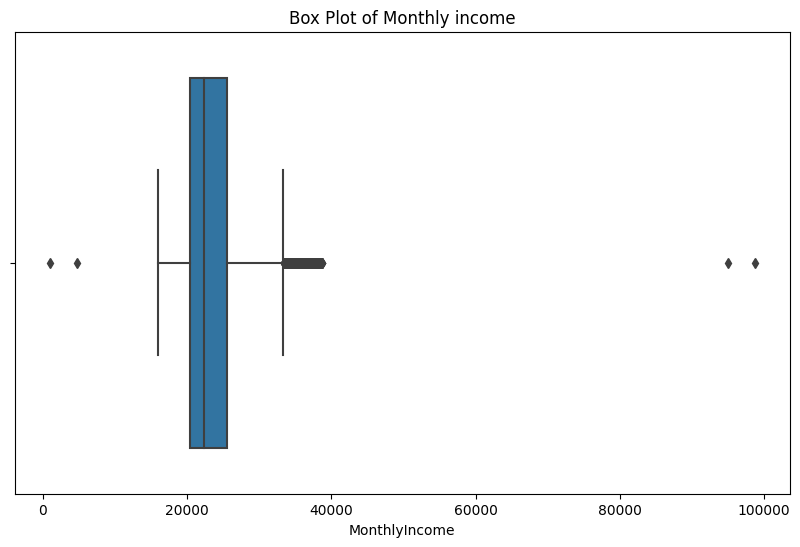

In [ ]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MonthlyIncome'])
plt.title('Box Plot of Monthly income')
plt.show()

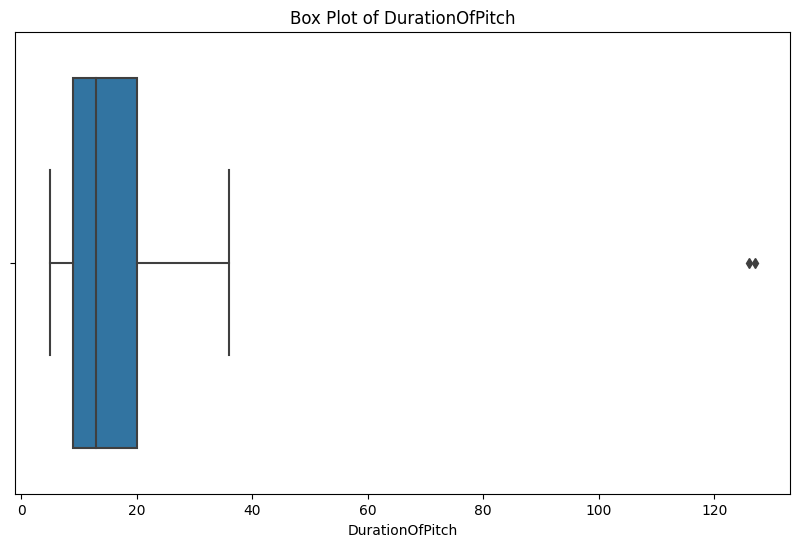

In [ ]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['DurationOfPitch'])
plt.title('Box Plot of DurationOfPitch')
plt.show()

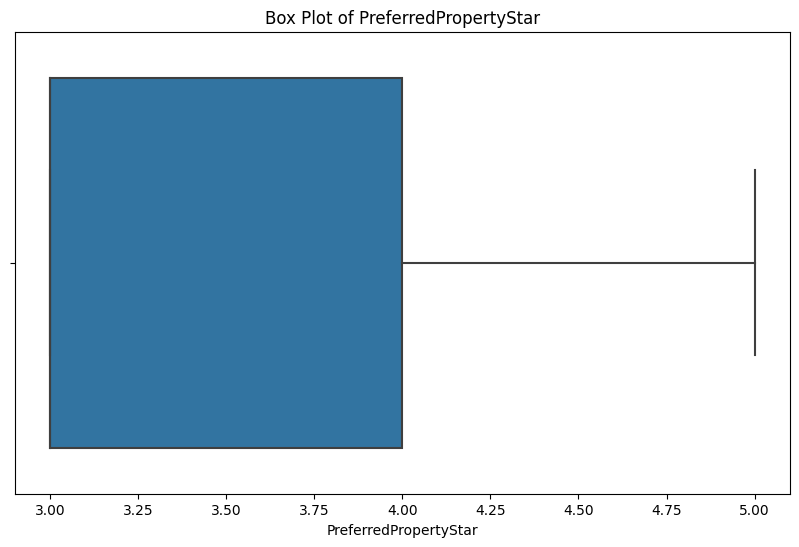

In [ ]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['PreferredPropertyStar'])
plt.title('Box Plot of PreferredPropertyStar')
plt.show()

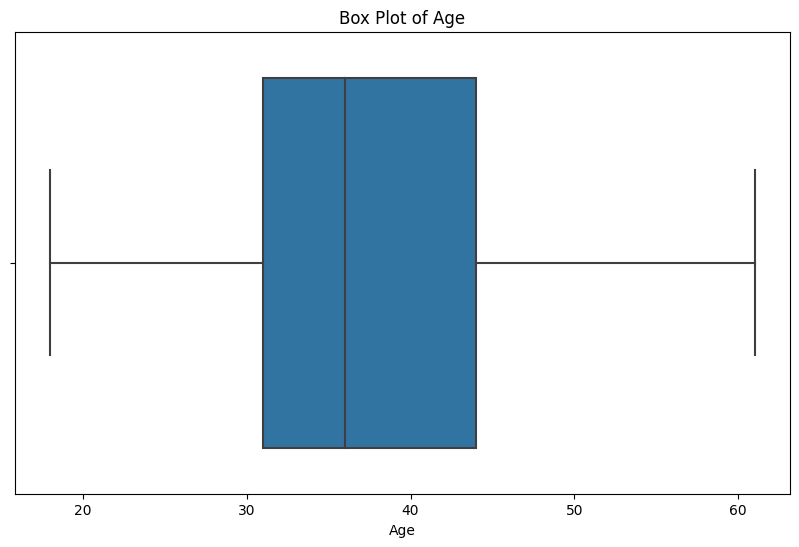

In [ ]:
#  Outlier Detection
# Box plot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.show()

**Preprocessing**

The Gender column may not be included as a feature .
The TypeofContact, Occupation, ProductPitched, MaritalStatus, and Designation columns can be included as features because

**Data cleaning**

In [ ]:
df_prep = df.copy()
df_prep

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


**Handling Inconsistent Data**

In [ ]:
df_prep.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
df_prep['Gender'] = df_prep['Gender'].replace('Fe Male', 'Female')
df_prep['MaritalStatus'] = df_prep['MaritalStatus'].replace('Single', 'Unmarried')

print('Gender :', df_prep['Gender'].unique().tolist())
print('Marital Status:', df_prep['MaritalStatus'].unique().tolist())

Gender : ['Female', 'Male']
Marital Status: ['Unmarried', 'Divorced', 'Married']


**Handling missing values**

In [ ]:
missing_cols = df_prep.columns[df_prep.isnull().any()]
df_prep[missing_cols].isnull().sum()

Age                         226
TypeofContact                25
DurationOfPitch             251
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

In [ ]:
# statistics on numerical columns (missing cols)
df_prep[missing_cols].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [ ]:
# statistics on categorical columns (missing cols)
df_prep[missing_cols].select_dtypes(include='object').describe()

,TypeofContact
count,4863
unique,2
top,Self Enquiry
freq,3444


From the observations made during EDA, the handling of missing values ​​used is:

The Age column will be filled with the mean value (data distribution is close to normal).
The TypeofContact column will be filled with the value 'Unknown' (the mode value is too high).
The DurationOfPitch column will be filled with the median value (the data distribution contains outliers because it is skewed).
The NumberOfFollowups column will be filled with the min value (assumed there is no follow up after pitching).
The PreferredPropertyStar column will be filled with the value 3 (moderate rating value).
The NumberOfTrips column will be filled with the median value (the data distribution contains outliers because it is skewed).
The NumberOfChildrenVisiting column will be filled with the value 0 (considered not having children under 5 years).
The MonthlyIncome column will be filled with the median value (data distribution contains outliers because it is skewed)

In [ ]:
# handling missing values
df_prep['Age'].fillna(df_prep['Age'].median(), inplace=True)
df_prep['TypeofContact'].fillna('Unknown', inplace=True)
df_prep['DurationOfPitch'].fillna(df_prep['DurationOfPitch'].median(), inplace=True)
df_prep['NumberOfFollowups'].fillna(0, inplace=True)
df_prep['PreferredPropertyStar'].fillna(3, inplace=True)
df_prep['NumberOfTrips'].fillna(df_prep['NumberOfTrips'].median(), inplace=True)
df_prep['NumberOfChildrenVisiting'].fillna(0, inplace=True)
df_prep['MonthlyIncome'].fillna(df_prep['MonthlyIncome'].median(), inplace=True)


#median_age=df['Age'].median()    #Handling missing values
#df['Age']= df['Age'].fillna(df['Age'].median())
#df['DurationOfPitch']=df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())   #Handling missing values
#df['NumberOfFollowups']=df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].median())
#df['PreferredPropertyStar']=df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].median())
#df['NumberOfTrips']=df['NumberOfTrips'].fillna(df['NumberOfTrips'].median())
#df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].median())
#df['MonthlyIncome']=df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())



⦁	In categorical column TypeOfContact missing values are filled with unknown
⦁	NumberOfChildrenVisiting and NumberOfFolloeups are filled with 0 and ,PrefferedPropertyStar filled with 3


In [ ]:

df_prep.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

**Handling Duplicate Data**

The CustomerID column can be deleted because each row has a different customer ID.

In [ ]:
# remove CustomerID to see duplicate rows
df_prep.drop('CustomerID', axis=1, inplace=True)
print(f'The number of rows before filtering for duplicate data is {df_prep.shape[0]}')

# remove duplicate rows
df_prep.drop_duplicates(inplace=True)
print(f'The number of rows after filtering duplicate data is {df_prep.shape[0]}')

The number of rows before filtering for duplicate data is 4888
The number of rows after filtering duplicate data is 4747


note..The z-score is a score that measures how many standard deviations a data point is away from the mean.The z-score must be used with a normal distribution, which is one of the prerequisites for calculating a standard deviation. We know that in a normal distribution, over 99% of values fall within 3 standard deviations from the mean. Because of this, we can assume that if a z-score returned is larger than 3 that the value is quite unusual.

**Handling outliers**

In [ ]:
# view total rows before filtered
print(f'The number of rows before filtering outliers is {df_prep.shape[0]}')

# handle outlier using z-score
filtered_entries = np.array([True] * len(df_prep))
skewed_cols = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
for col in skewed_cols:
    zscore = abs(stats.zscore(df_prep[col]))
    filtered_entries = (zscore < 3) & filtered_entries

# view total rows after filtered
df_prep = df_prep[filtered_entries]
print(f'The number of rows after filtering outliers is {df_prep.shape[0]}')

The number of rows before filtering outliers is 4747
The number of rows after filtering outliers is 4737


Feature Engineering

**Feature Engineering**

In [ ]:
# Remove rows with Occupation is `Free Lancer`
df_prep = df_prep[df_prep['Occupation'] != 'Free Lancer']

# View dimension size of data before encoding
print(f'Data dimensions before encoding are {df_prep.shape[0]} rows and {df_prep.shape[1]} columns')

# Label encoding
df_prep['Gender'] = df_prep['Gender'].map({'Female': 0, 'Male': 1})
df_prep['ProductPitched'] = df_prep['ProductPitched'].map({'Basic': 0, 'Standard': 1, 'Deluxe': 2,
                                                           'Super Deluxe': 3, 'King': 4})
df_prep['Designation'] = df_prep['Designation'].map({'Manager': 0, 'Senior Manager': 1, 'Executive': 2,
                                                     'AVP': 3, 'VP': 4})

# One-hot encoding
for col in ['TypeofContact', 'Occupation', 'MaritalStatus']:
    onehots = pd.get_dummies(df_prep[col], prefix=col, drop_first=True)  # use drop_first=True to reduce dimensions
    df_prep = pd.concat([df_prep, onehots], axis=1)
    df_prep.drop(columns=col, axis=1, inplace=True)

# View dimension size of data after encoding
print(f'Data dimensions after encoding are {df_prep.shape[0]} rows and {df_prep.shape[1]} columns')

Data dimensions before encoding are 4735 rows and 19 columns
Data dimensions after encoding are 4735 rows and 22 columns


In [ ]:
df_prep

,ProdTaken,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_Unknown,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Married,MaritalStatus_Unmarried
0,1,41.0,3,6.0,0,3,3.0,2,3.0,1.0,1,2,1,0.0,0,20993.0,1,0,1,0,0,1
1,0,49.0,1,14.0,1,3,4.0,2,4.0,2.0,0,3,1,2.0,0,20130.0,0,0,1,0,0,0
3,0,33.0,1,9.0,0,2,3.0,0,3.0,2.0,1,5,1,1.0,2,17909.0,0,0,1,0,0,0
4,0,36.0,1,8.0,1,2,3.0,0,4.0,1.0,0,5,1,0.0,2,18468.0,1,0,0,1,0,0
5,0,32.0,1,8.0,1,3,3.0,0,3.0,1.0,0,5,1,1.0,2,18068.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,3,9.0,1,3,5.0,2,4.0,2.0,1,1,1,1.0,0,26576.0,1,0,0,1,0,1
4884,1,28.0,1,31.0,1,4,5.0,0,3.0,3.0,1,3,1,2.0,2,21212.0,0,0,1,0,0,1
4885,1,52.0,3,17.0,0,4,4.0,1,4.0,7.0,0,1,1,3.0,1,31820.0,1,0,1,0,1,0
4886,1,19.0,3,16.0,1,3,4.0,0,3.0,3.0,0,5,0,2.0,2,20289.0,1,0,0,1,0,1


**Feature Extraction**

# get correlation > +- 0.5

In [ ]:
# get correlation > +- 0.5

df_corr = df_prep.corr().iloc[1:,1:]
df_corr = df_corr.apply(lambda x: round(x, 3))
dfcorr = []
for idx in df_corr.index:
    for col in df_corr.columns:
        dfcorr.append([idx, col])
        if (np.abs(df_corr.loc[idx, col]) > 0.5) and (idx != col) and [col, idx] not in dfcorr:
            print(f'{idx} with {col} has correlation : {df_corr.loc[idx, col]}')

NumberOfPersonVisiting with NumberOfChildrenVisiting has correlation : 0.595
ProductPitched with MonthlyIncome has correlation : 0.678
Occupation_Salaried with Occupation_Small Business has correlation : -0.837
MaritalStatus_Married with MaritalStatus_Unmarried has correlation : -0.659


In [ ]:
# create new column for feature
df_prep['TotalVisiting'] = df_prep['NumberOfPersonVisiting'] + df_prep['NumberOfChildrenVisiting']
df_prep.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

**Split Train & Test Set**

In [ ]:
X = df_prep.drop('ProdTaken', axis=1)
y = df_prep['ProdTaken']

In [ ]:
# splitting into data train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(f'The amount of training data consists of {len(X_train)} rows')
print(f'Number of class 0 : {sum(y_train==0)}')
print(f'Number of class 1 : {sum(y_train==1)}\n')

print(f'The amount of test data consists of {len(X_test)} rows')
print(f'Number of class 0 : {sum(y_test==0)}')
print(f'Number of class 1 : {sum(y_test==1)}\n')

The amount of training data consists of 3788 rows
Number of class 0 : 3076
Number of class 1 : 712

The amount of test data consists of 947 rows
Number of class 0 : 769
Number of class 1 : 178



**Feature Transformation**

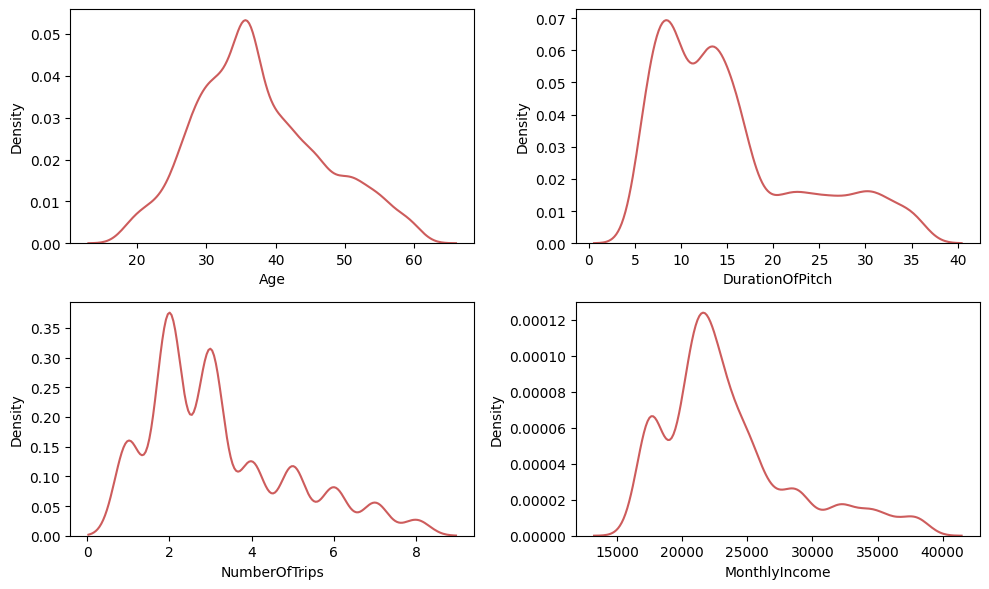

In [ ]:
# distribution of data before scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_prep[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

Based on the results of this visualization, then:

The Age column will be scaled with Normalization because it approaches a normal distribution.
The NumberOfTrips column is not scaled because the data values ​​are not too varied after handling outliers.
The DurationOfPitch and MonthlyIncome columns will be scaled with Standardization because they are slightly skewed.

**Scaling data**

In [ ]:
# scaling using normalization
scaler = MinMaxScaler()
scaler.fit(X_train['Age'].values.reshape(-1, 1))
X_train['Age'] = scaler.transform(X_train['Age'].values.reshape(-1, 1))
X_test['Age'] = scaler.transform(X_test['Age'].values.reshape(-1, 1))

# scaling using standardization
scaler = StandardScaler()
scaler.fit(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_train['DurationOfPitch'] = scaler.transform(X_train['DurationOfPitch'].values.reshape(-1, 1))
X_test['DurationOfPitch'] = scaler.transform(X_test['DurationOfPitch'].values.reshape(-1, 1))

scaler.fit(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_train['MonthlyIncome'] = scaler.transform(X_train['MonthlyIncome'].values.reshape(-1, 1))
X_test['MonthlyIncome'] = scaler.transform(X_test['MonthlyIncome'].values.reshape(-1, 1))

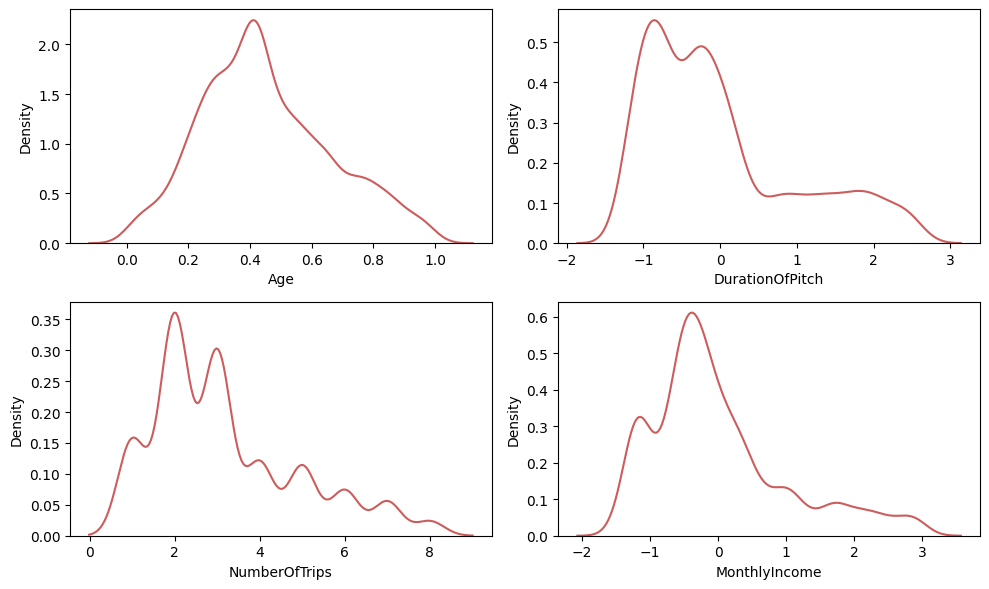

In [ ]:
# distribution of data after scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=X_train[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [ ]:

# statistics data after transformation
X_train[['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']].describe()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
count,3788.000000,3788.000000,3788.000000,3.788000e+03
mean,0.451763,0.000000,3.197202,-3.170056e-16
std,0.210987,1.000132,1.745316,1.000132e+00
min,0.000000,-1.283932,1.000000,-1.492633e+00
25%,0.302326,-0.788172,2.000000,-6.095633e-01
50%,0.418605,-0.292411,3.000000,-2.373719e-01
75%,0.581395,0.451230,4.000000,3.789695e-01
max,1.000000,2.558212,8.000000,2.991687e+00


From these statistical results it is known that:

The Age column has a min value = 0 and a max value = 1 after normalization.
The NumberOfTrips column has a min value = 1 and a max value = 8. It is considered that the data range does not vary too much.
The DurationOfPitch and MonthlyIncome columns have a min value = -1 and a standard deviation value = 1 after standardization

**Feature Selection**

In [ ]:
# Feature selection using Variance threshold
vars = VarianceThreshold(0.2)
vars.fit(X_train)
X_train_fs = pd.DataFrame(vars.transform(X_train),columns=vars.get_feature_names_out())
X_test_fs = pd.DataFrame(vars.transform(X_test),columns=vars.get_feature_names_out())

In [ ]:
# Feature selection using fclassif for numerical feature
nume_cols = ['DurationOfPitch','NumberOfFollowups','NumberOfTrips','MonthlyIncome','TotalVisiting']

classif = SelectKBest(f_classif,k=4)
classif.fit(X_train_fs[nume_cols],y_train)
X_train_fnum = pd.DataFrame(classif.transform(X_train_fs[nume_cols]),columns=classif.get_feature_names_out())
X_test_fnum = pd.DataFrame(classif.transform(X_test_fs[nume_cols]),columns=classif.get_feature_names_out())

In [ ]:
# Feature selection using chi2 for categorical feature
cate_cols = ['CityTier','Gender','ProductPitched','PreferredPropertyStar','Passport','PitchSatisfactionScore','OwnCar','Designation',
 'TypeofContact_Self Enquiry','Occupation_Salaried','Occupation_Small Business','MaritalStatus_Married','MaritalStatus_Unmarried',]

chi2 = SelectKBest(chi2,k=8)
chi2.fit(X_train_fs[cate_cols],y_train)
X_train_chi2 = pd.DataFrame(chi2.transform(X_train_fs[cate_cols]),columns=chi2.get_feature_names_out())
X_test_chi2 = pd.DataFrame(chi2.transform(X_test_fs[cate_cols]),columns=chi2.get_feature_names_out())

In [ ]:
# merging all feature selection result
all_coll = classif.get_feature_names_out().tolist() + chi2.get_feature_names_out().tolist()
X_train = X_train[all_coll]
X_test = X_test[all_coll]

print(f'Feature selection results are: {all_coll}')

Feature selection results are: ['DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome', 'CityTier', 'ProductPitched', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'Designation', 'MaritalStatus_Married', 'MaritalStatus_Unmarried']


12 features selected

**Handling imbalance data**

In [ ]:

print(f'The amount of training data before SMOTE consists of {len(X_train)} rows')
print(f'Number of class 0 in training data: {sum(y_train==0)}')
print(f'Number of class 1 in training data: {sum(y_train==1)}\n')

# Applying SMOTE to the training data
smote = SMOTE( random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print(f'Amount of training data after SMOTE consisting of {len(X_train)} rows')
print(f'Number of class 0 in resampled training data: {sum(y_train==0)}')
print(f'Number of class 1 in resampled training data: {sum(y_train==1)}\n')




The amount of training data before SMOTE consists of 3788 rows
Number of class 0 in training data: 3076
Number of class 1 in training data: 712

Amount of training data after SMOTE consisting of 6152 rows
Number of class 0 in resampled training data: 3076
Number of class 1 in resampled training data: 3076



In [ ]:
c=pd.DataFrame(X_train,y_train)
c

,DurationOfPitch,NumberOfFollowups,NumberOfTrips,MonthlyIncome,CityTier,ProductPitched,PreferredPropertyStar,Passport,PitchSatisfactionScore,Designation,MaritalStatus_Married,MaritalStatus_Unmarried
ProdTaken,,,,,,,,,,,,
0,1.566691,3.0,4.0,1.758806,1,3,3.0,0,1,3,1,0
0,1.566691,3.0,4.0,1.758806,1,3,3.0,0,1,3,1,0
0,1.566691,3.0,4.0,1.758806,1,3,3.0,0,1,3,1,0
0,1.566691,3.0,4.0,1.758806,1,3,3.0,0,1,3,1,0
1,0.203350,3.0,5.0,-0.973734,1,0,3.0,0,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.203350,3.0,5.0,-0.973734,1,0,3.0,0,3,2,0,1
1,0.203350,3.0,5.0,-0.973734,1,0,3.0,0,3,2,0,1
1,0.203350,3.0,5.0,-0.973734,1,0,3.0,0,3,2,0,1


In [ ]:
# save file preprocessing into csv
X_train.to_csv('Travel_Preprocessing_train.csv', index=False)
X_test.to_csv('Travel_Preprocessing_test.csv', index=False)

**Machine Learning Modelling & Evaluation**

Here we will use 12 features resulting from feature selection using variance threshold, fclassif and chi square

**Model Selection**

In [ ]:
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['Not Taken', 'Taken'])
    ax.yaxis.set_ticklabels(['Not Taken', 'Taken'])
    plt.show()

    print(f'From the {title} model it is found that:')
    print(f'- Total TP (True Positive) = {cm[1][1]}')
    print(f'- Total TN (True Negative) = {cm[0][0]}')
    print(f'- Total FP (False Positive) = {cm[0][1]}')
    print(f'- Total FN (False Negative) = {cm[1][0]}')

**1. Logistic Regression**

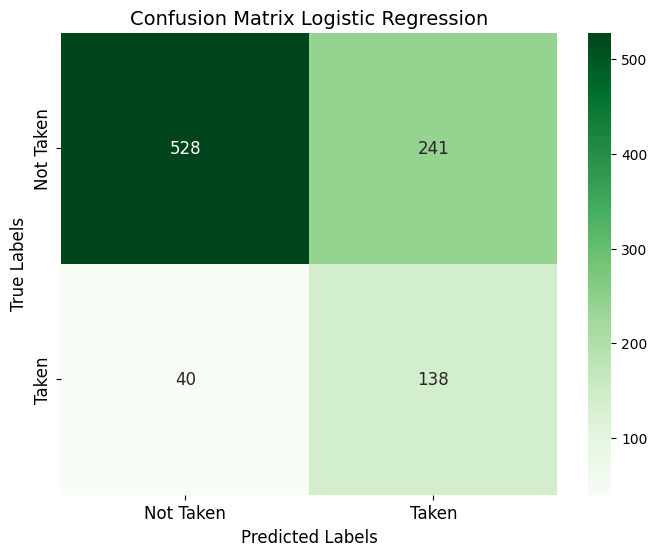

From the Logistic Regression model it is found that:
- Total TP (True Positive) = 138
- Total TN (True Negative) = 528
- Total FP (False Positive) = 241
- Total FN (False Negative) = 40


In [ ]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

plotting_confusion_matrix(model_lr, X_test, y_test, title='Logistic Regression')

**2. Decision Tree**

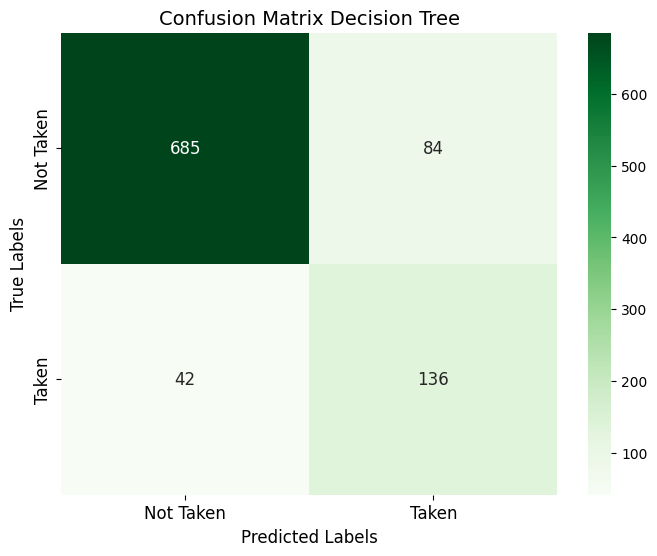

From the Decision Tree model it is found that:
- Total TP (True Positive) = 136
- Total TN (True Negative) = 685
- Total FP (False Positive) = 84
- Total FN (False Negative) = 42


In [ ]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

plotting_confusion_matrix(model_dt, X_test, y_test, title='Decision Tree')

**3. Random Forest**

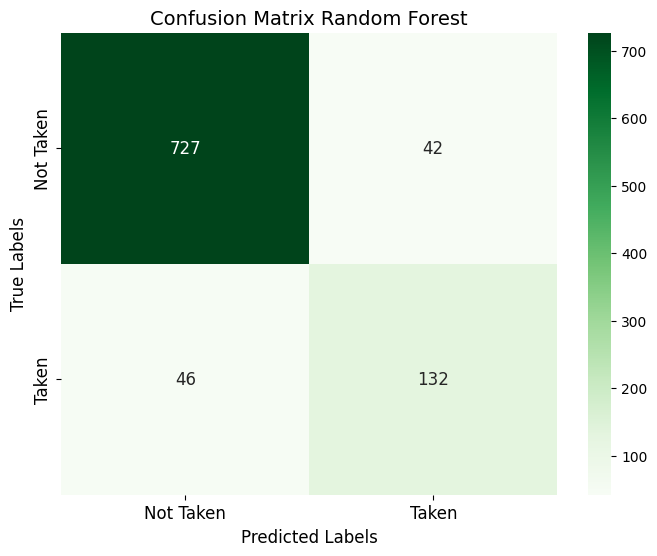

From the Random Forest model it is found that:
- Total TP (True Positive) = 132
- Total TN (True Negative) = 727
- Total FP (False Positive) = 42
- Total FN (False Negative) = 46


In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

plotting_confusion_matrix(model_rf, X_test, y_test, title='Random Forest')

**Model Evaluation**

In our case, we aim to predict whether customers will buy a travel package based on the available data. It is possible that there are still customers who have the potential to be converted to buy a travel package, then:

The evaluation metric that we will focus on is Accuracy where we want to consider accuracy in predictions.

In [ ]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    mcc = round(matthews_corrcoef(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)

    return accuracy, precision, recall, f1, mcc, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC (Test)', 'AUC (Train)']

    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_classification(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)

    return df_model

In [ ]:
# scoring base model
model_list_base = [model_lr, model_dt, model_rf]
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.7033,0.3641,0.7753,0.4955,0.3683,0.7977,0.7939
1,Decision Tree,0.8669,0.6182,0.7640,0.6834,0.6058,0.8274,1.0000
2,Random Forest,0.9071,0.7586,0.7416,0.7500,0.6930,0.9434,1.0000


From the evaluation results of the five models, it was found that:

The Logistic Regression model was able to produce sufficient accuracy, namely 70.43%.
The Decision Tree model is able to produce quite high accuracy, namely 84.37%.
The Random Forest model is able to produce very high accuracy, namely 91.02%.

So it can be concluded from the five models selected, while the Random Forest Model is the best base model, we still have to carry out further tuning to avoid overfitting.

**Hyperparameter Tuning**

In [ ]:
list_hyperparameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.logspace(-3, 3, 20)]
    },
    { # Decision Tree
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'max_features' : ['auto', 'sqrt']
    },
    { # Random Forest
        'n_estimators' : [int(x) for x in np.linspace(50, 1000, 50)],
        'max_features' : ['auto', 'sqrt', 'log2'],
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'criterion' : ['gini','entropy'],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'class_weight' : ['balanced', 'balanced_subsample'],
        'oob_score' : [True, False]
    }

]

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_estimator_.get_params()[key])

def eval_after_hyperparameter_tuning(model, X_train, y_train, X_test, y_test):
    eval_new = eval_classification(model, X_train, y_train, X_test, y_test)
    eval_score = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    for score, e in zip(eval_score, eval_new):
        print(score + ': ' + str(e))

**1. Logistic Regression**

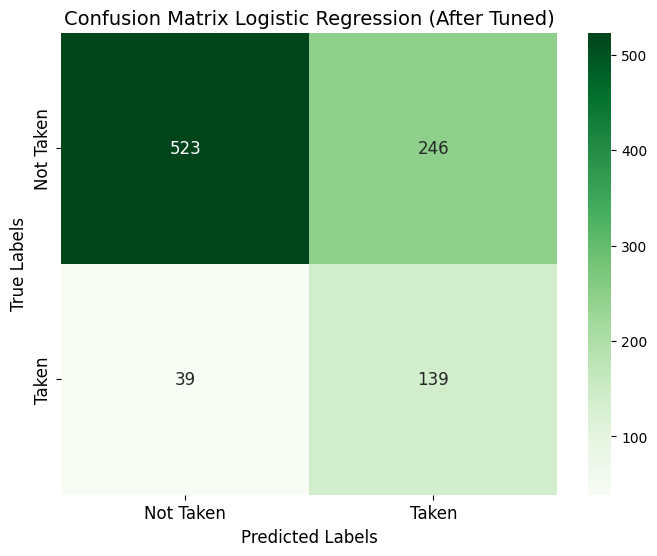

From the Logistic Regression (After Tuned) model it is found that:
- Total TP (True Positive) = 139
- Total TN (True Negative) = 523
- Total FP (False Positive) = 246
- Total FN (False Negative) = 39


In [ ]:
model_lr = LogisticRegression(random_state=42)
tuned_lr = RandomizedSearchCV(model_lr, list_hyperparameters[0], cv=5, scoring='accuracy', random_state=42)
tuned_lr.fit(X_train, y_train)

plotting_confusion_matrix(tuned_lr, X_test, y_test, title='Logistic Regression (After Tuned)')

In [ ]:
print('MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING')
print('=====================================================')
show_best_hyperparameter(tuned_lr, list_hyperparameters[0])
print('=====================================================')
eval_after_hyperparameter_tuning(tuned_lr, X_train, y_train, X_test, y_test)

MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING
Best penalty: l2
Best C: 0.018329807108324356
Accuracy: 0.699
Precision: 0.361
Recall: 0.7809
F1 Score: 0.4938
AUC (Test): 0.3667
AUC (Train): 0.798


**2. Decision Tree**

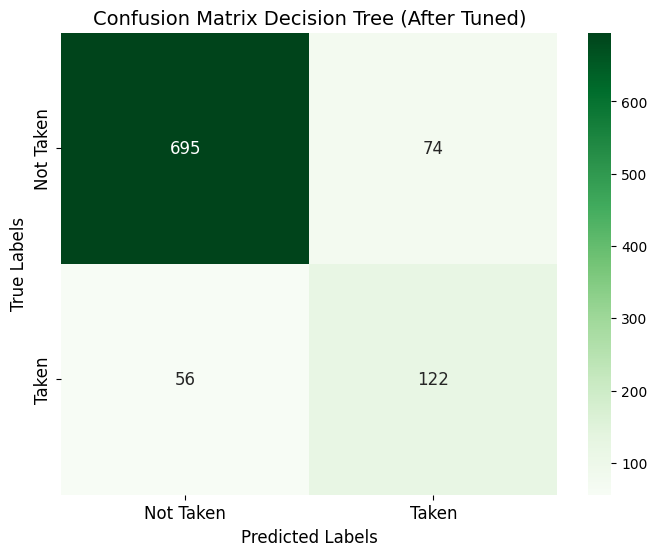

From the Decision Tree (After Tuned) model it is found that:
- Total TP (True Positive) = 122
- Total TN (True Negative) = 695
- Total FP (False Positive) = 74
- Total FN (False Negative) = 56


In [ ]:
model_dt = DecisionTreeClassifier(random_state=42)
tuned_dt = RandomizedSearchCV(model_dt, list_hyperparameters[1], cv=5, scoring='accuracy', random_state=42)
tuned_dt.fit(X_train, y_train)

plotting_confusion_matrix(tuned_dt, X_test, y_test, title='Decision Tree (After Tuned)')

In [ ]:
print('MODEL DECISION TREE AFTER HYPERPARAMETER TUNING')
print('===============================================')
show_best_hyperparameter(tuned_dt, list_hyperparameters[1])
print('===============================================')
eval_after_hyperparameter_tuning(tuned_dt, X_train, y_train, X_test, y_test)

MODEL DECISION TREE AFTER HYPERPARAMETER TUNING
Best max_depth: 100
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_features: auto
Accuracy: 0.8627
Precision: 0.6224
Recall: 0.6854
F1 Score: 0.6524
AUC (Test): 0.5681
AUC (Train): 0.7946


**3. Random Forest**

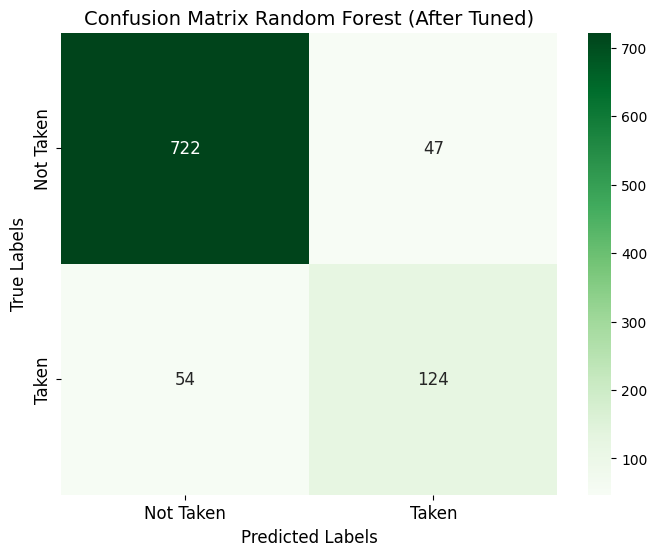

From the Random Forest (After Tuned) model it is found that:
- Total TP (True Positive) = 124
- Total TN (True Negative) = 722
- Total FP (False Positive) = 47
- Total FN (False Negative) = 54


In [ ]:
model_rf = RandomForestClassifier(random_state=42)
tuned_rf = RandomizedSearchCV(model_rf, list_hyperparameters[2], cv=5, scoring='accuracy', random_state=42)
tuned_rf.fit(X_train, y_train)

plotting_confusion_matrix(tuned_rf, X_test, y_test, title='Random Forest (After Tuned)')

In [ ]:
print('MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING')
print('===============================================')
show_best_hyperparameter(tuned_rf, list_hyperparameters[2])
print('===============================================')
eval_after_hyperparameter_tuning(tuned_rf, X_train, y_train, X_test, y_test)

MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING
Best n_estimators: 709
Best max_features: log2
Best max_depth: 50
Best criterion: entropy
Best min_samples_split: 6
Best min_samples_leaf: 1
Best class_weight: balanced
Best oob_score: True
Accuracy: 0.8933
Precision: 0.7251
Recall: 0.6966
F1 Score: 0.7106
AUC (Test): 0.6455
AUC (Train): 0.9321


In [ ]:
# base model
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.7033,0.3641,0.7753,0.4955,0.3683,0.7977,0.7939
1,Decision Tree,0.8669,0.6182,0.7640,0.6834,0.6058,0.8274,1.0000
2,Random Forest,0.9071,0.7586,0.7416,0.7500,0.6930,0.9434,1.0000


In [ ]:
# tuned model
model_list_tuned = [tuned_lr, tuned_dt, tuned_rf]
score_all_classification(model_list_tuned, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.6990,0.3610,0.7809,0.4938,0.3667,0.7980,0.7933
1,Decision Tree,0.8627,0.6224,0.6854,0.6524,0.5681,0.7946,1.0000
2,Random Forest,0.8933,0.7251,0.6966,0.7106,0.6455,0.9321,0.9999


In [ ]:
#Check Overfitting and Underfitting
def checkoverfit(model,x_train,x_test,title):
    cek = pd.DataFrame({
        'Model': title,
        'accuracy_score_train':[accuracy_score(y_train,model.predict(x_train))],
        'accuracy_score_test' :[accuracy_score(y_test,model.predict(x_test))],
        'accuracy_score_cv' : [model.best_score_]
        })
    return cek
checkoverfit(tuned_rf,X_train,X_test,'Random Forest Classifier')

,Model,accuracy_score_train,accuracy_score_test,accuracy_score_cv
0,Random Forest Classifier,0.993986,0.893347,0.933365


From the results of this evaluation it can be concluded that:

The Random Forest model produced an accuracy of 89.76%, where the results decreased by around after tuning the hyperparameters.
 it can be concluded that the Random Forest model remains the best model with the highest accuracy, namely 89.33% and the results of other scoring metrics are also superior with the hyperparameter tuning that has been carried out and is not overfit.

**Modelling Conclusion**

1.From a series of modeling that has been carried out, the model with feature selection based on feature importance gives better results where the 12 features include DurationOfPitch, NumberOfFollowups, NumberOfTrips, MonthlyIncome, CityTier, ProductPitched, PreferredPropertyStar, Passport, PitchSatisfactionScore, Designation, MaritalStatus_Married, MaritalStatus_Unmarried.

2.The model that gives the best results is the  Random Forest model with an accuracy of 89.76%

In [ ]:
import pickle

In [ ]:
f=open('mymodel2.pkl', 'wb')
pickle.dump(tuned_rf,f)

In [ ]:
f.close()

In [ ]:
a=open('/content/mymodel2.pkl','rb')


In [ ]:
our_model=pickle.load(a)

In [ ]:
k=[[1.5666910077977176,3.0,4.0,1.7588058573127272,1,3,3.0,0,1,3,1,0]]

In [ ]:
x=our_model.predict(k)
x

array([0])

In [ ]:
import pickle

# Load the trained model
with open('model2.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    predictions = loaded_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)

Accuracy: 0.8933474128827877


In [ ]:
import pickle

# New input features (replace with your actual data)
new_k = [[14.0, 4.0, 2.0, 20993, 1, 2, 4.0, 1, 2, 0, 0, 0]]

# Make predictions
predictions = loaded_model.predict(new_k)

# Print the predictions
print(f'The predicted class for the input data is: {predictions}')



The predicted class for the input data is: [0]


In [ ]:
# import pickle
# pickle.dump(tuned_rf, open('model (1).pkl', 'wb'))

In [ ]:
#model = pickle.load(open('model2.pkl', 'rb'))

In [ ]:
#model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [ ]:
y_train.to_csv('Travel_Preprocessing_ytrain.csv', index=False)
y_test.to_csv('Travel_Preprocessing_ytest.csv', index=False)

In [ ]:
0.203350	3.0	5.0	-0.973734	1	0	3.0	0	3	2	0	1